<a href="https://colab.research.google.com/github/MoaazEmam/Digital_Calculator/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Moaaz Emam Ahmed**
**Top accuracy: 92.59% using KNeighbors**

In [ ]:
#login
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# Download latest version
path = kagglehub.dataset_download("rishidamarla/heart-disease-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rishidamarla/heart-disease-prediction/versions/1


# **Data Loading and understanding**

In [ ]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from scipy import stats
warnings.filterwarnings("ignore")

In [ ]:
file_path = os.path.join(path, "Heart_Disease_Prediction.csv")
train_data = pd.read_csv(file_path)
train_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data_columns = train_data.columns
data_columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
#to further understand the data, we'll use describe function
summary = train_data.describe()
print(summary)

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

From the data, we can see that multiple columns may have an effect on the presence of heart disease.
We'll attempt to find patterns between the columns and heart disease.
We can also find patterns between columns like Age or Sex and BP or Cholestrol which could help us further develop our prediction.
We'll clean the data before trying to find patterns.

# **Lets examine the initial patterns in the data**

In [ ]:
#we'll copy the main data to a df before cleaning incase we need to return the original data
df = train_data.copy()

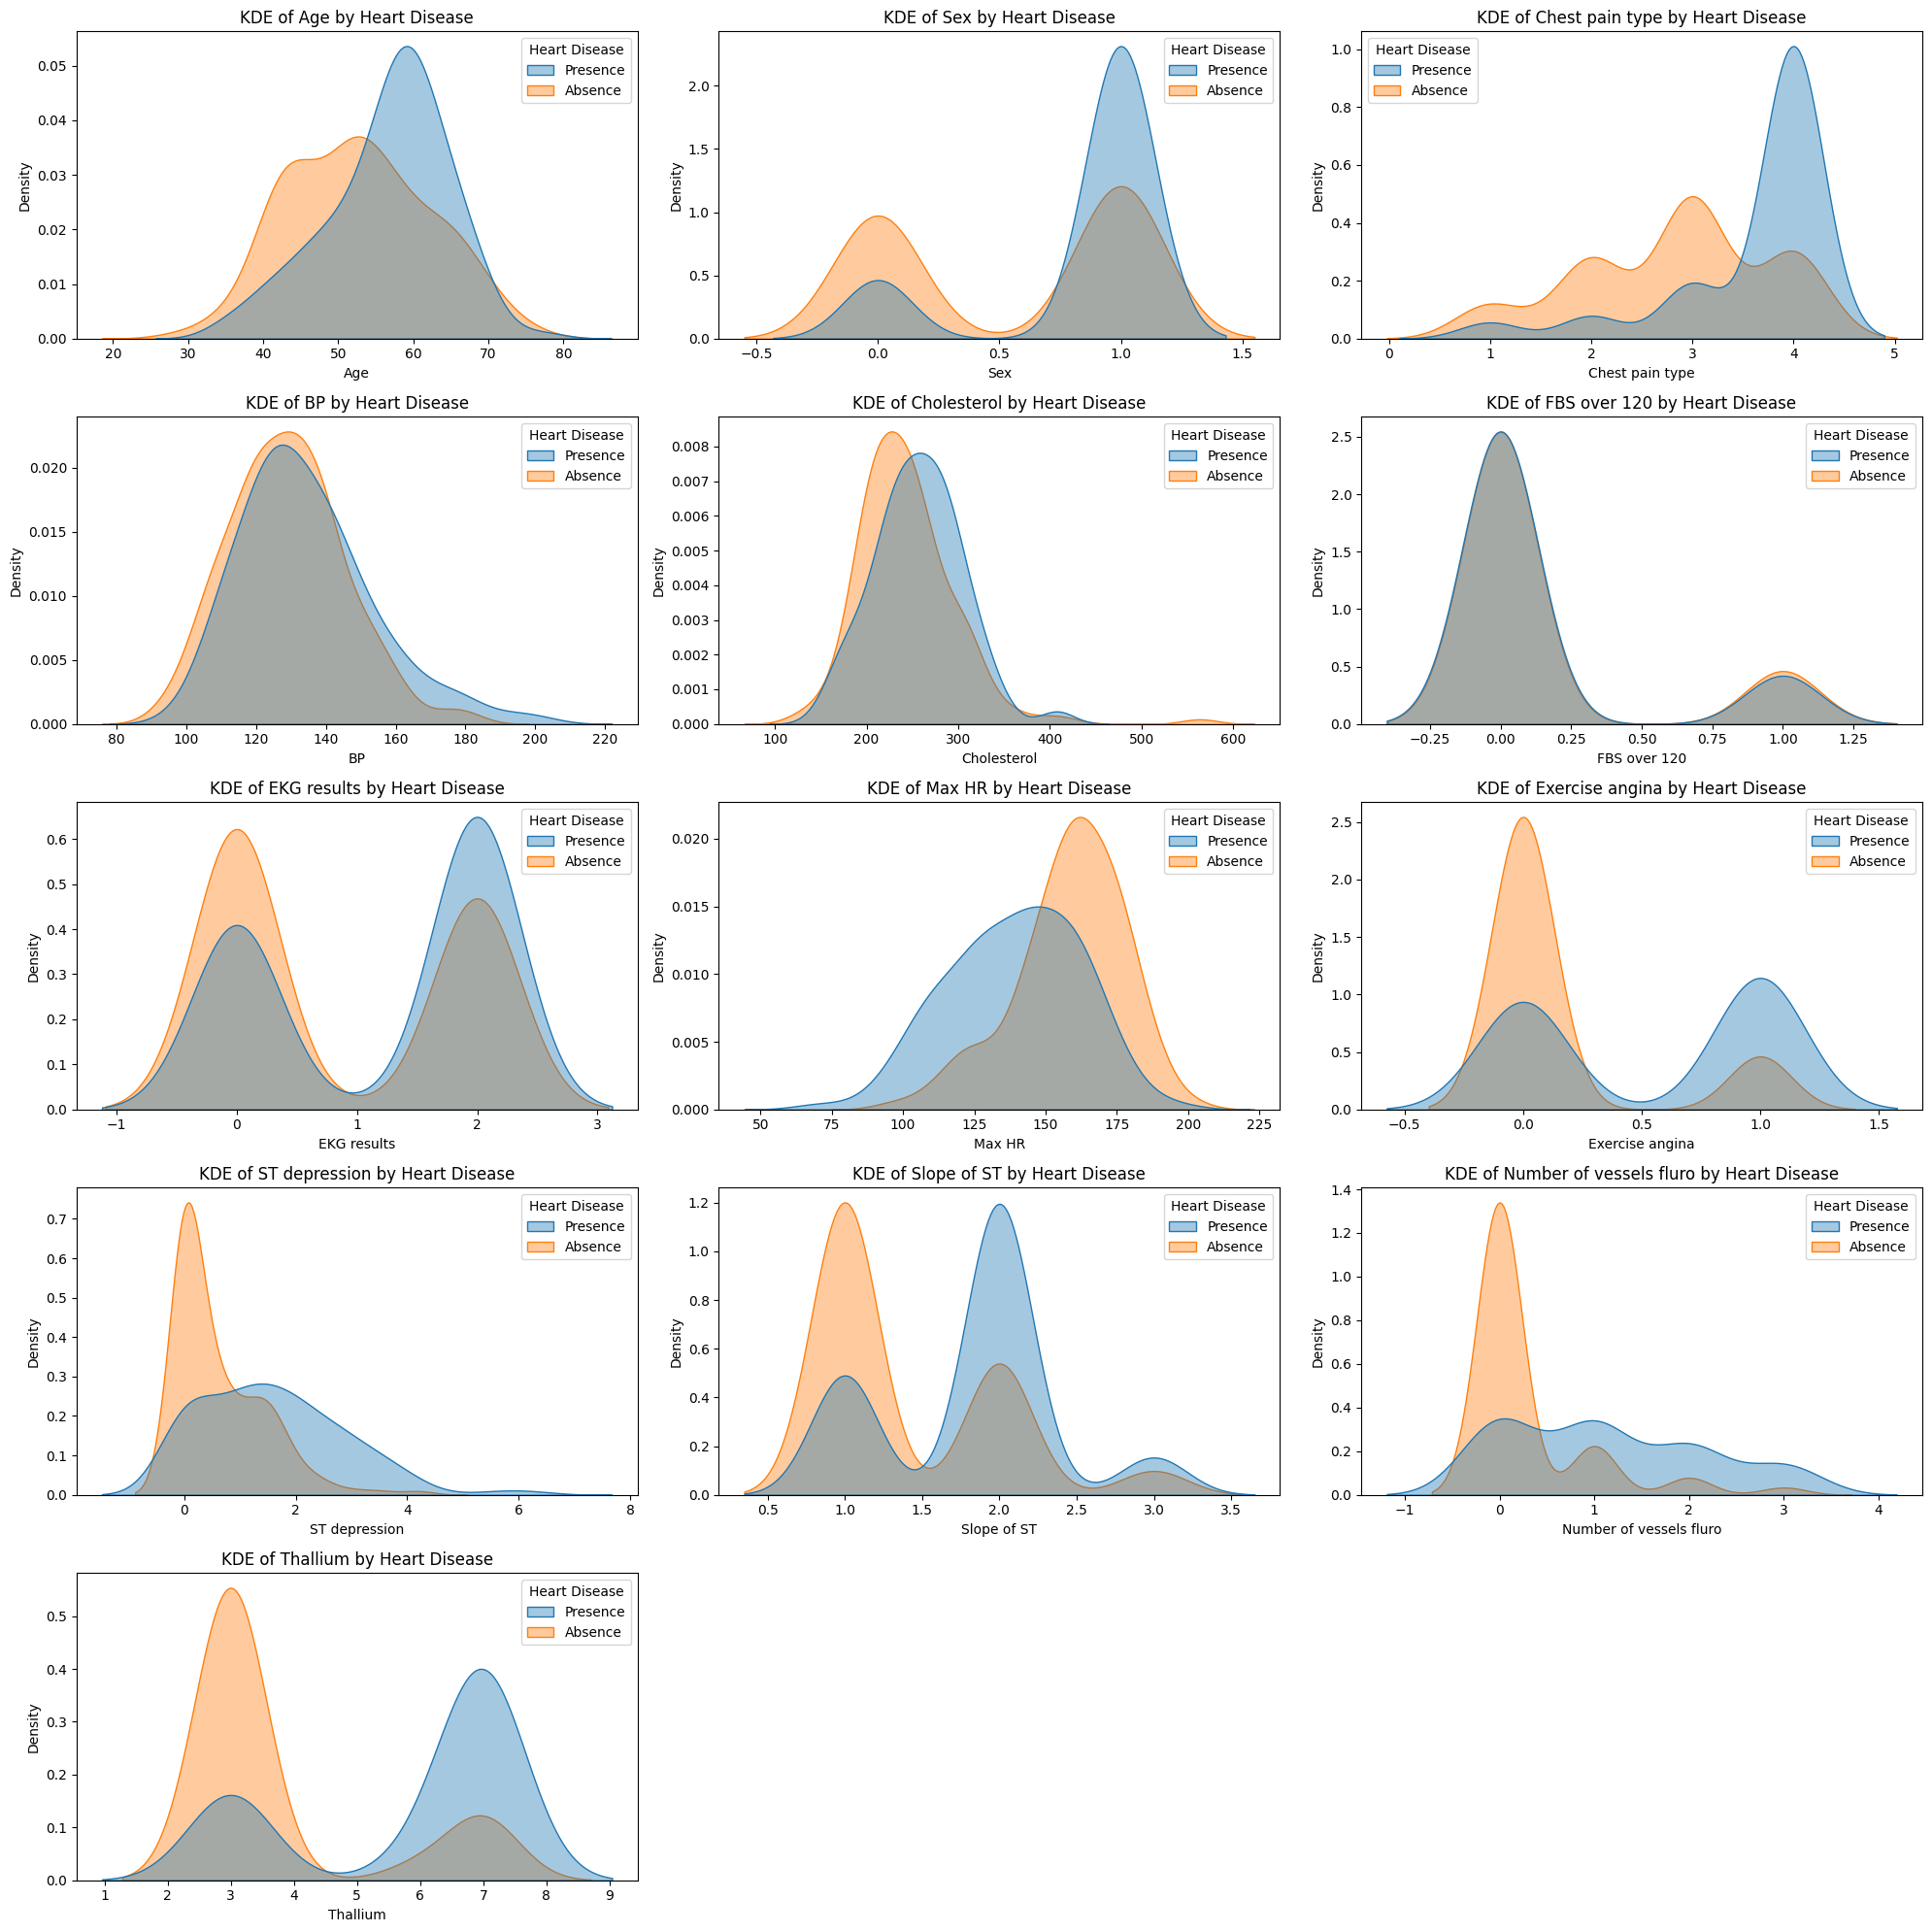

In [ ]:
#KDE plot to examine relationships between each column and the outcome 'heart disease'
#updating numeric cols (all data is numeric)
#Only for this first plot we will deal with all cols as numeric except the outcome 'Heart disease'
numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.kdeplot(data=df, x=col, hue="Heart Disease", common_norm=False, fill=True, alpha=0.4)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col} by Heart Disease')
plt.tight_layout()
plt.show()

We can see that the column 'FBS over 120' clearly has to no relationship with our results.

In [ ]:
df=df.drop('FBS over 120',axis=1)
df

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,148,0,0.4,2,0,6,Absence


Numerical features: Age, BP, CHolesterol, Max HR, ST depression

Categorical features: Sex, Chest pain type, EKG results, Exercise angina, Slope of ST, Number of vessels fluro, Thallium

In [ ]:
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
categorical_cols = ['Sex', 'Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

# **Data cleaning and preprocessing**

In [ ]:
#check for nulls first
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


no nulls found

In [ ]:
#now we check for zeros
zero_counts = (df[numerical_cols] == 0).sum()
print(zero_counts)

Age               0
BP                0
Cholesterol       0
Max HR            0
ST depression    85
dtype: int64


We can see that only the feature 'ST depression' contains zeros. After some research, I concluded that this is a possible natural occurance so I will not change do anything to change the zeros.

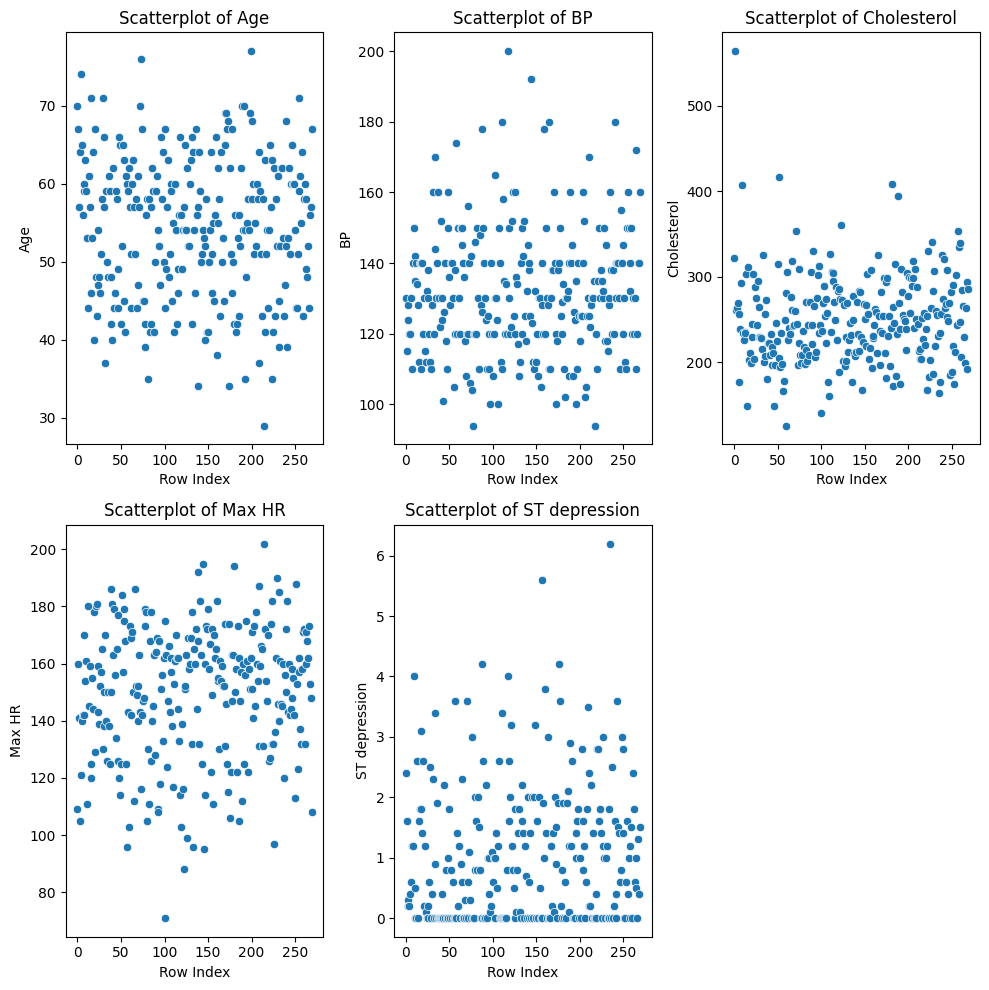

In [ ]:
#visualize outliers using scatterplots
import math
num_cols = len(numerical_cols)
num_rows = math.ceil((num_cols + 2) // 3)

plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.scatterplot(x=df.index,y=df[col])
    plt.xlabel('Row Index')
    plt.ylabel(col)
    plt.title(f'Scatterplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
#we can see there are possible outliers.
#we'll use IQR to detect the number of outliers in each (repeating for all columns since numerical results are more accurate than inferences from visualization)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Number of outliers in {col}: ")
    col_outliers = df[(train_data[col] < lower_bound) | (df[col] > upper_bound)]
    print(len(col_outliers))

Number of outliers in Age: 
0
Number of outliers in BP: 
9
Number of outliers in Cholesterol: 
5
Number of outliers in Max HR: 
1
Number of outliers in ST depression: 
4


We can see that the number of outliers is small compared to the size of the data; and after testing the different models we saw a significant increase in accuracy when the outliers were not changed, so we will not change them.

code to remove outliers below...if you are interested in trying.

In [ ]:
#as we can see, we were not 100% correct
#now we need to deal with outliers
#since we only have 270 rows and we cant be sure if the outliers are a result of genuine measurments or errors, we'll use capping to replace them with the nearest non-outlier value
#outlier_cols = df[['Age','BP', 'Cholesterol', 'Max HR','ST depression']]
#for col in outlier_cols:
#    Q1 = train_data[col].quantile(0.25)
#    Q3 = train_data[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
#    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
#now lets check again for outliers
#for col in numerical_cols:
#    Q1 = train_data[col].quantile(0.25)
#    Q3 = train_data[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
#    print(f"Number of outliers in {col}: ")
#    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#    print(len(col_outliers))

Number of outliers in Age: 
0
Number of outliers in BP: 
9
Number of outliers in Cholesterol: 
5
Number of outliers in Max HR: 
1
Number of outliers in ST depression: 
4


no outliers after clipping

In [ ]:
#now we check for duplicates
duplicate_rows = train_data[train_data.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


no duplicates found

# **Testing Data Imbalance**

In [ ]:
class_distribution = train_data['Heart Disease'].value_counts()
print(class_distribution)

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


Data is balanced, no need to account for imbalance

# **Visualization to find patterns**

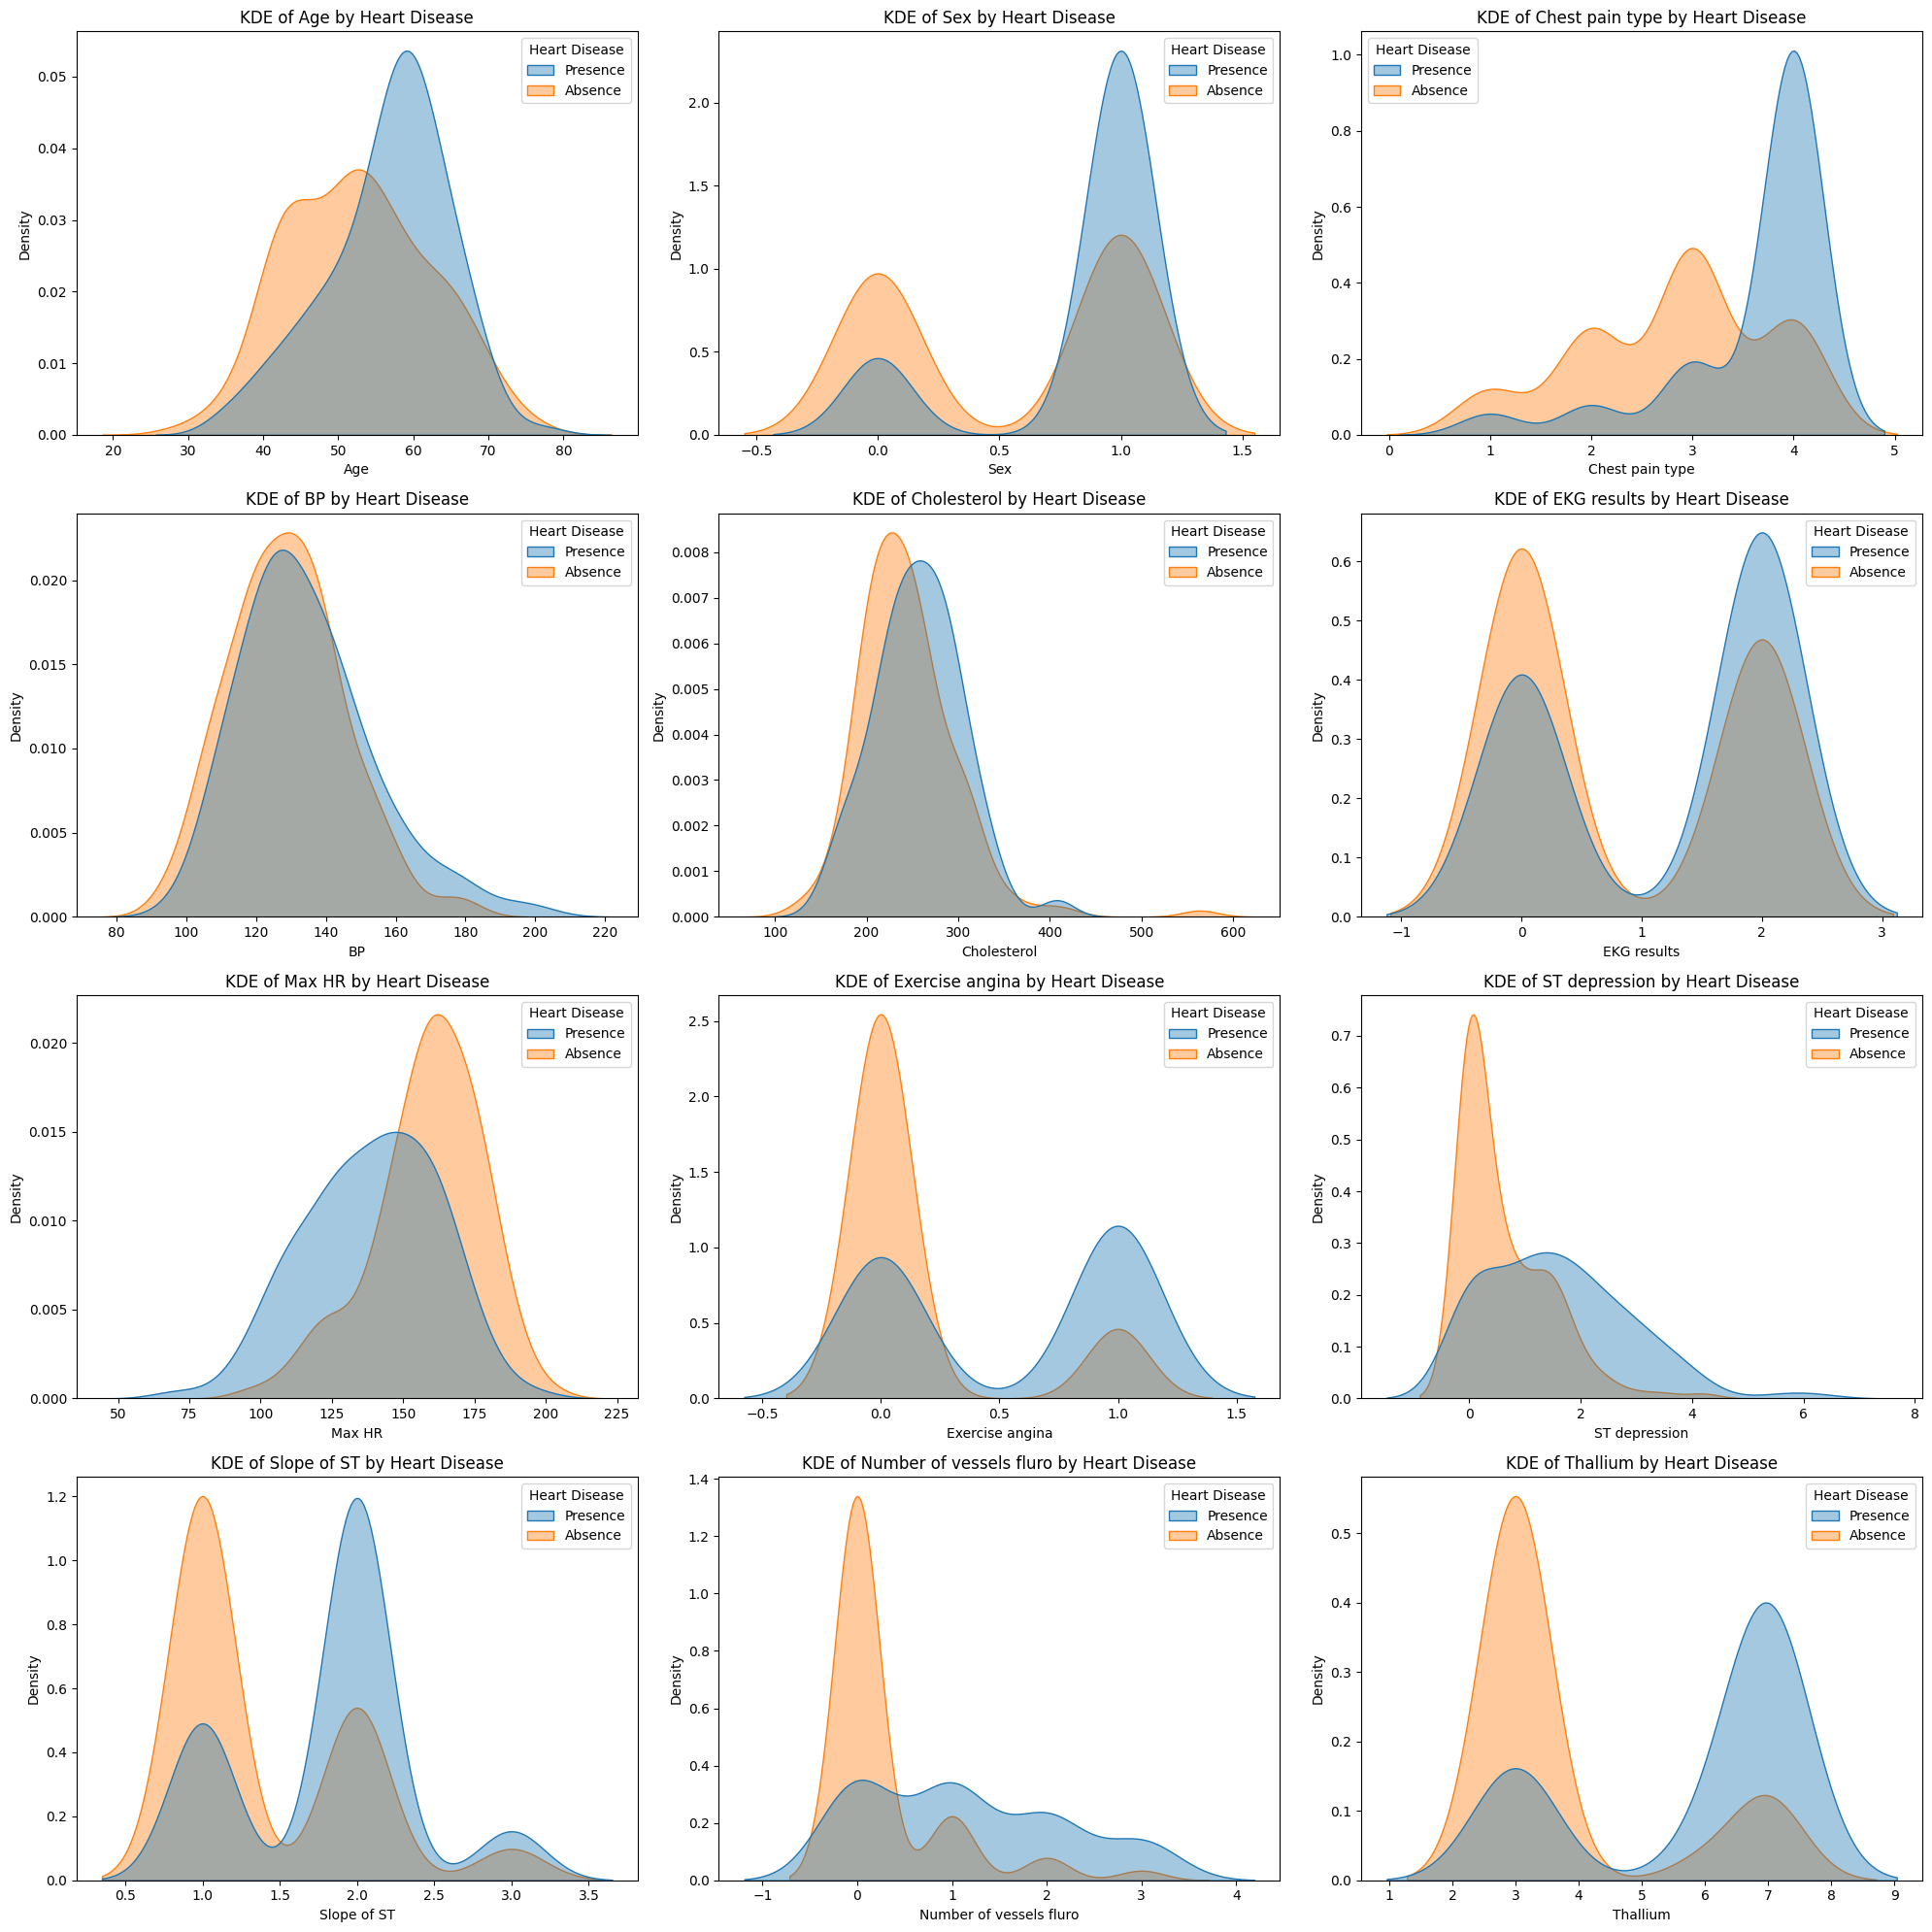

In [ ]:
#KDE plot to examine relationships between each column and the outcome 'heart disease'
#updating cols
numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.kdeplot(data=df, x=col, hue="Heart Disease", common_norm=False, fill=True, alpha=0.4)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col} by Heart Disease')
plt.tight_layout()
plt.show()

In [ ]:
#first we convert the column heart disease to numerical with 1:presence and 0:absence
#normalize it to avoid errors
df['Heart Disease'] = df['Heart Disease'].astype(str).str.strip().str.capitalize()
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,2,121,1,0.2,1,1,3,0


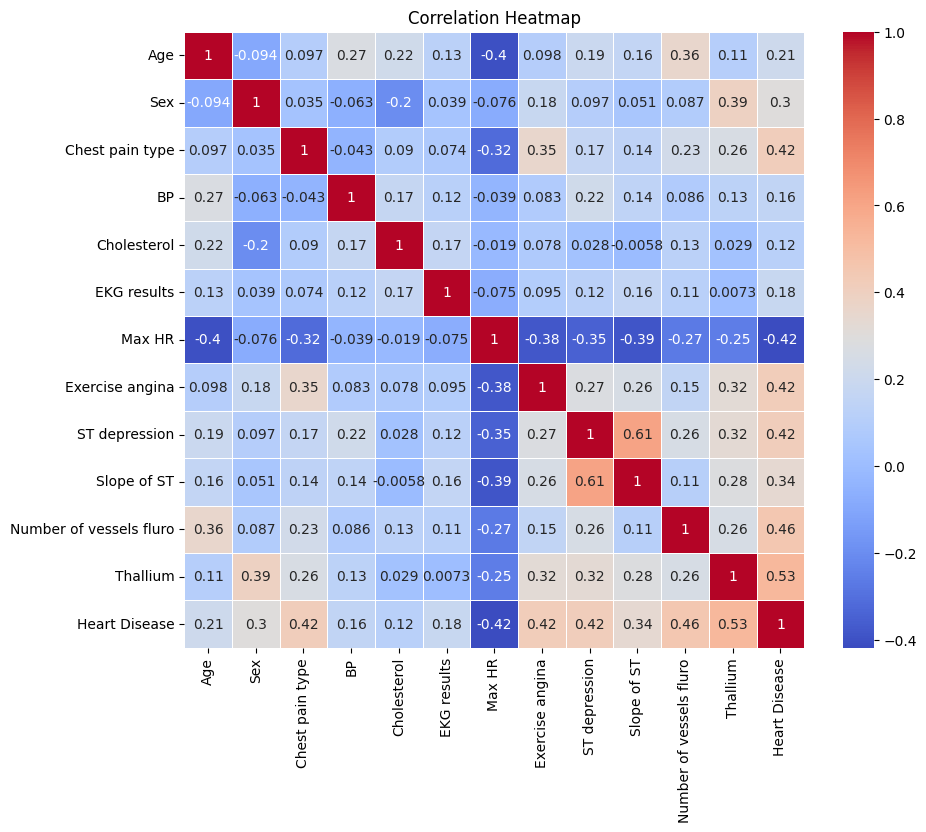

In [ ]:
#correlation heatmap to further inspect relationships
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From both KDE and correlation heatmap, we can see that the important features are:


*   Age
*   Sex
*   Chest pain type
*   Max HR
*   Exercise angina
*   ST depression
*   Slope of ST
*   Number of vessels fluro
*   Thallium

However, after testing the models we found a significant increase in accuracy when the other features are not dropped, so we will keep them.



code to drop features below...if you're interested.

In [ ]:
#drop_cols=['BP','Cholesterol','EKG results']
#df=df.drop(drop_cols,axis=1)
#df

,Age,Sex,Chest pain type,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0.854167,1,4,0.290076,0,0.387097,2,3,3,1
1,0.791667,0,3,0.679389,0,0.258065,2,0,7,0
2,0.583333,1,2,0.534351,0,0.048387,1,0,7,1
3,0.729167,1,4,0.259542,1,0.032258,2,1,7,0
4,0.937500,0,2,0.381679,1,0.032258,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1,3,0.694656,0,0.080645,1,0,7,0
266,0.312500,1,2,0.778626,0,0.000000,1,0,7,0
267,0.562500,0,2,0.625954,0,0.209677,2,0,3,0
268,0.583333,1,4,0.587786,0,0.064516,2,0,6,0


In [ ]:
#updating numerical and categorical cols
#numerical_cols = ['Age', 'Max HR', 'ST depression']
#categorical_cols = ['Sex', 'Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

# **Normalization and binarization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[numerical_cols])

df[numerical_cols] = scaler.transform(df[numerical_cols])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0.854167,1,4,0.339623,0.447489,2,0.290076,0,0.387097,2,3,3,1
1,0.791667,0,3,0.198113,1.000000,2,0.679389,0,0.258065,2,0,7,0
2,0.583333,1,2,0.283019,0.308219,0,0.534351,0,0.048387,1,0,7,1
3,0.729167,1,4,0.320755,0.312785,0,0.259542,1,0.032258,2,1,7,0
4,0.937500,0,2,0.245283,0.326484,2,0.381679,1,0.032258,1,1,3,0


# **Visualizing the final data**

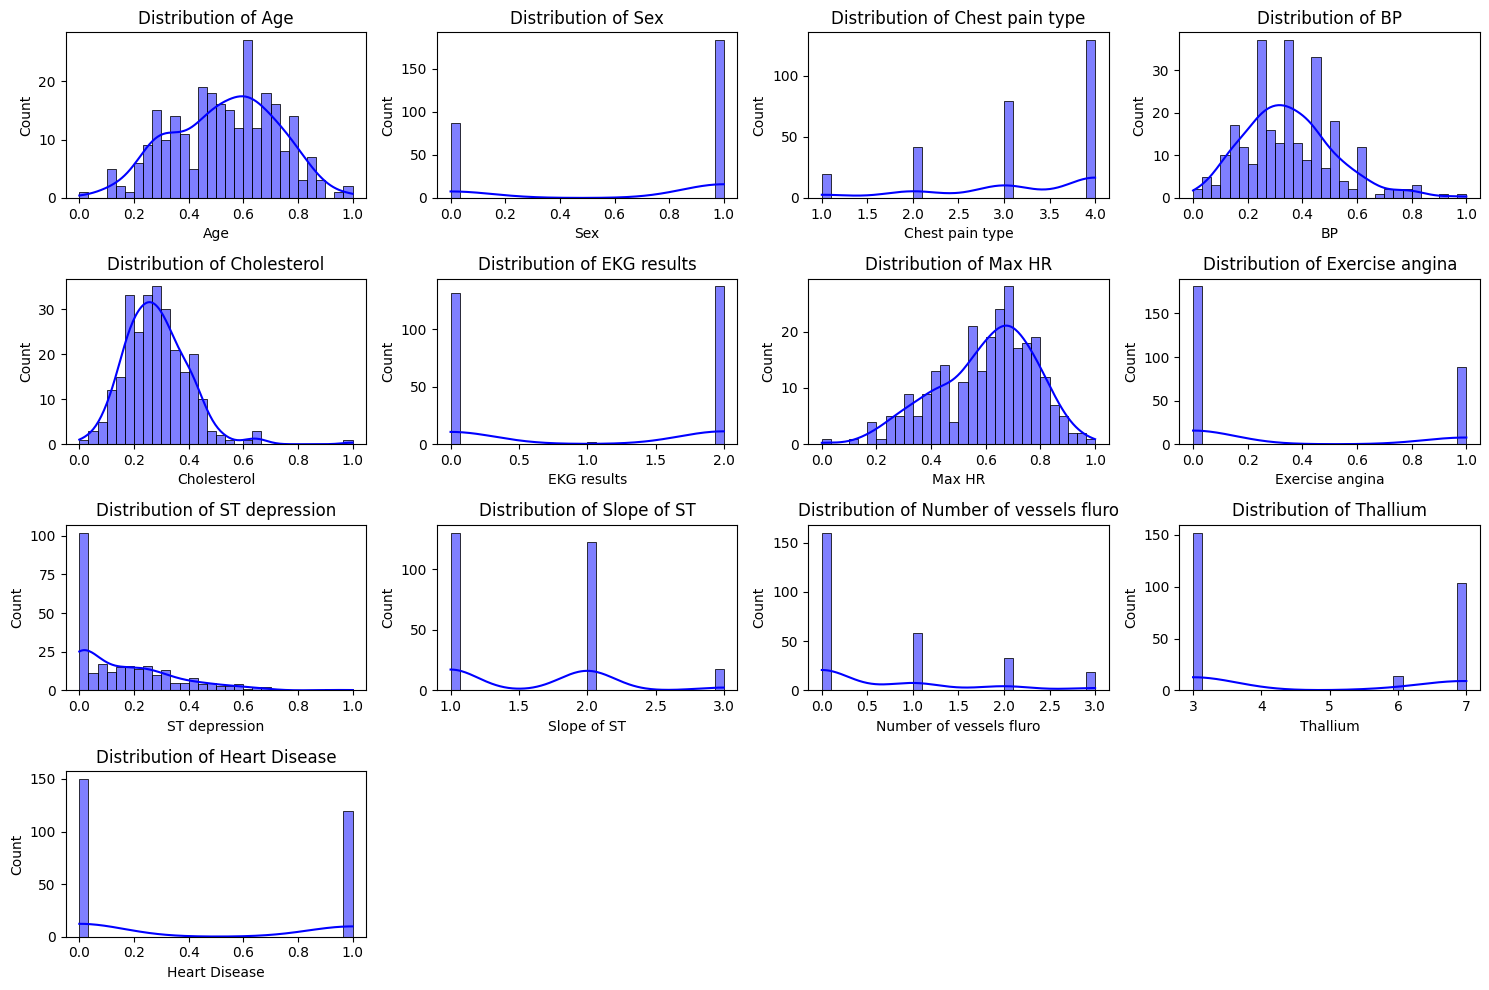

In [ ]:
#Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(df):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

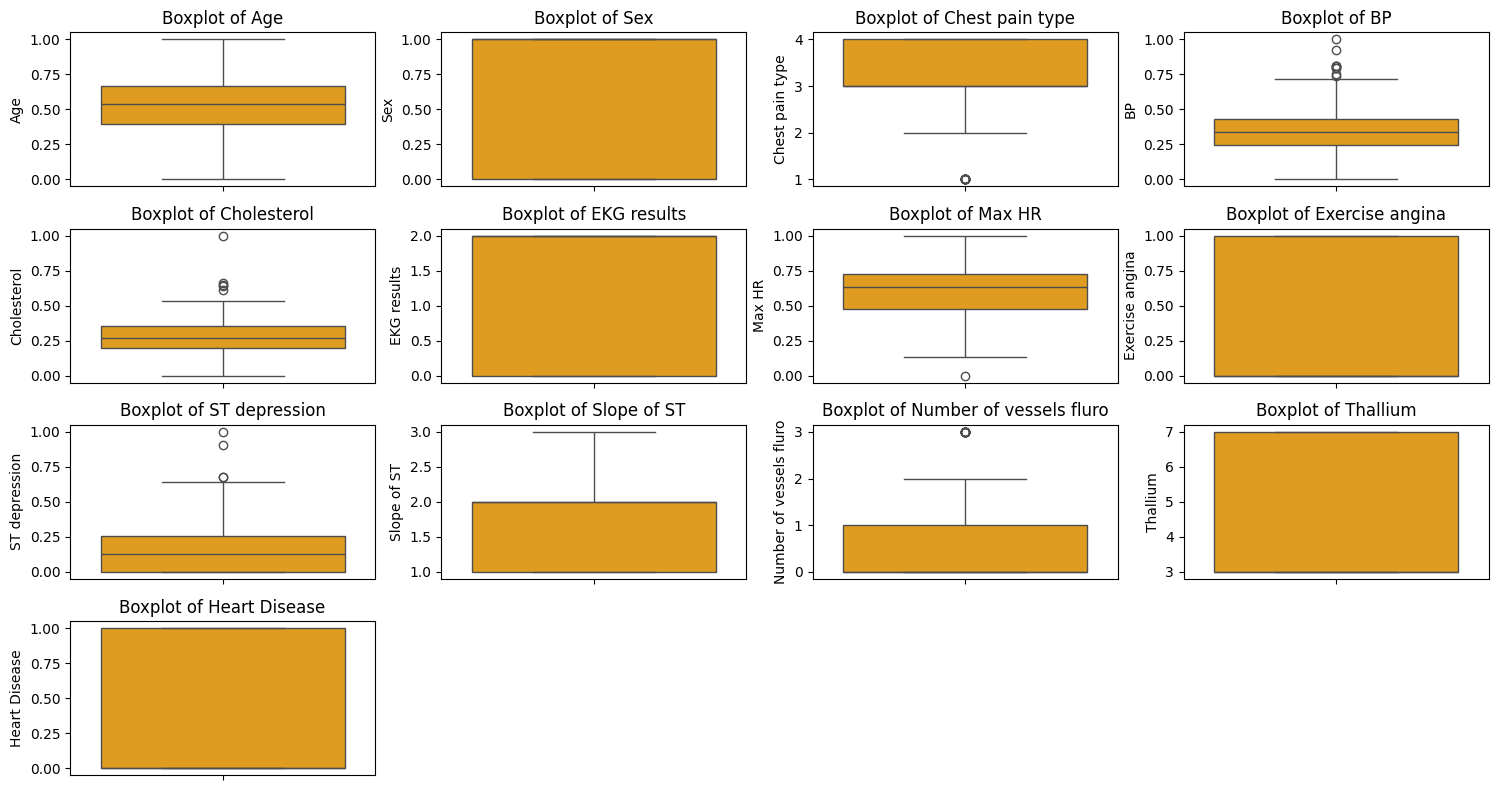

In [ ]:
#Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(df[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

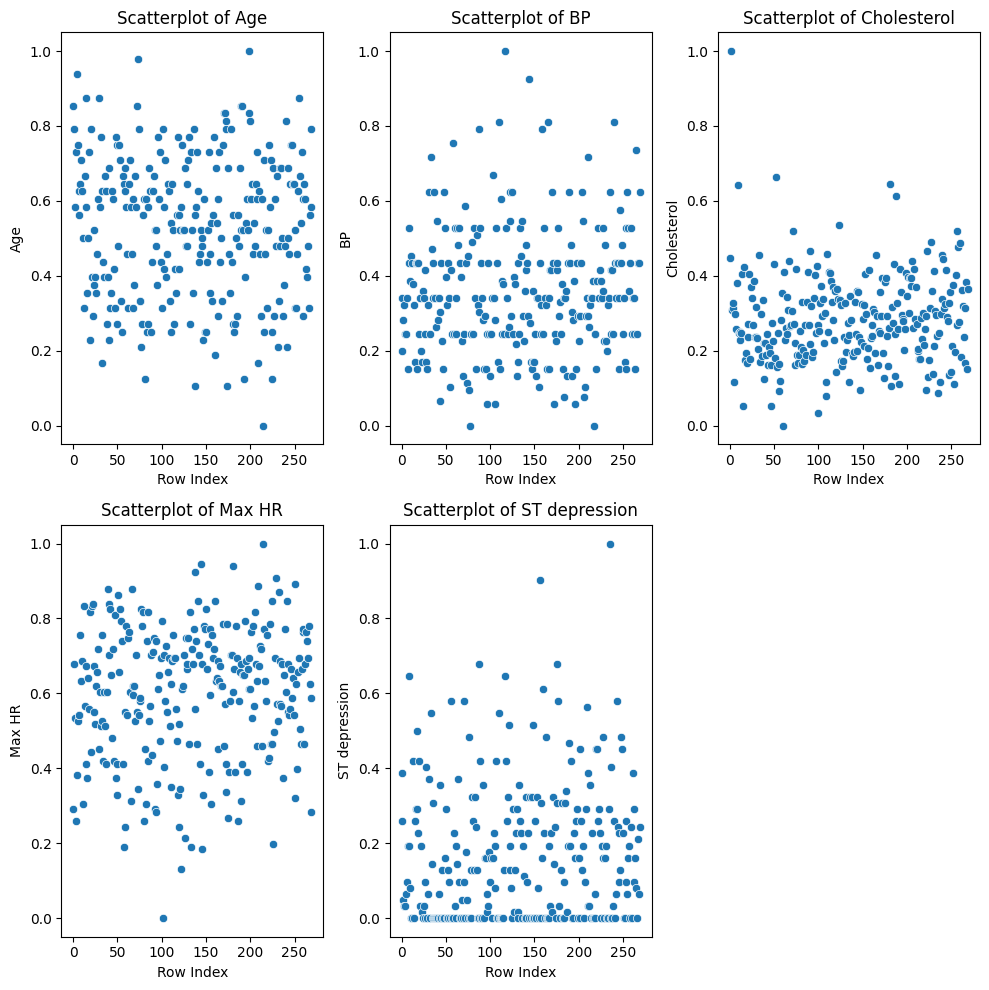

In [ ]:
#visualize outliers using scatterplots
num_cols = len(numerical_cols)
num_rows = math.ceil((num_cols + 2) // 3)

plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.scatterplot(x=df.index,y=df[col])
    plt.xlabel('Row Index')
    plt.ylabel(col)
    plt.title(f'Scatterplot of {col}')
plt.tight_layout()
plt.show()

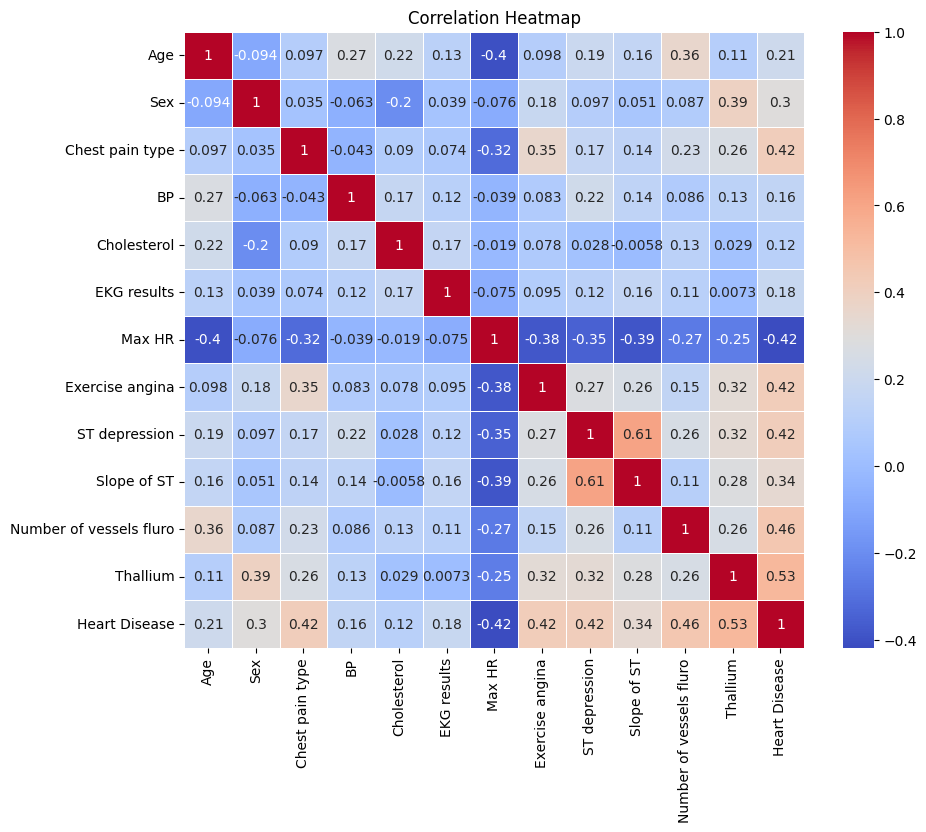

In [ ]:
#Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Splitting data and training models**

In [ ]:
#Labels
Y = df['Heart Disease'].values
Y.shape

(270,)

In [ ]:
#Features
X = df.drop(columns=['Heart Disease']).values
X.shape

(270, 12)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#set up models
models = {
    'LR': (LogisticRegression(max_iter=10000, random_state=42),{'solver': ['liblinear'], 'C': [0.1, 1]}),
    'SVM': (SVC(probability=True ,random_state=42), {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(),{'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}),
    'DT': (DecisionTreeClassifier(random_state=42),{'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']}),

    'RF': (RandomForestClassifier(random_state=42, n_jobs=-1),{'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
}


LR Performance:
Accuracy: 0.8889
Precision: 0.8892
Recall: 0.8889
F1 Score: 0.8877


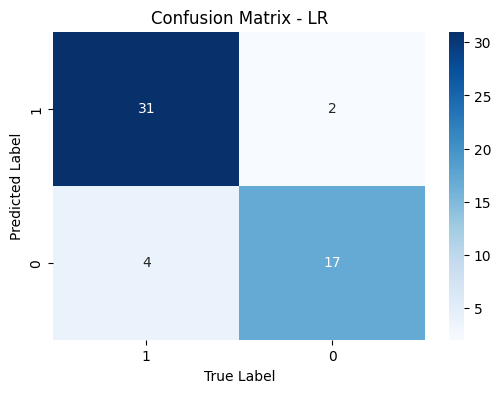


SVM Performance:
Accuracy: 0.8704
Precision: 0.8698
Recall: 0.8704
F1 Score: 0.8698


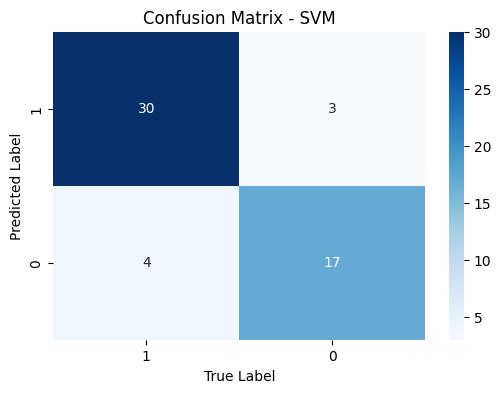


KNN Performance:
Accuracy: 0.9259
Precision: 0.9272
Recall: 0.9259
F1 Score: 0.9252


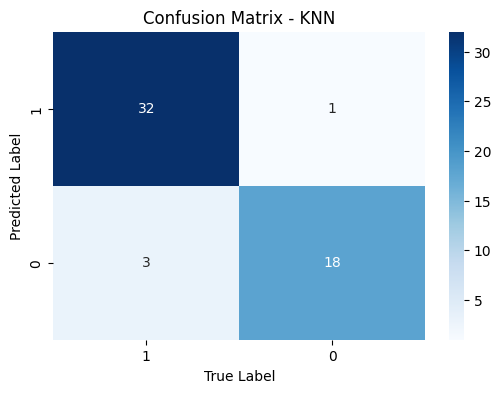


DT Performance:
Accuracy: 0.7037
Precision: 0.7284
Recall: 0.7037
F1 Score: 0.7074


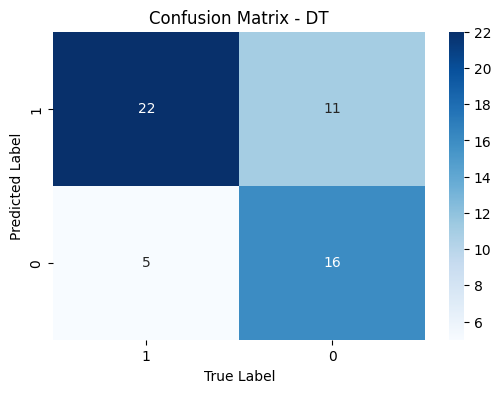


RF Performance:
Accuracy: 0.8333
Precision: 0.8388
Recall: 0.8333
F1 Score: 0.8279


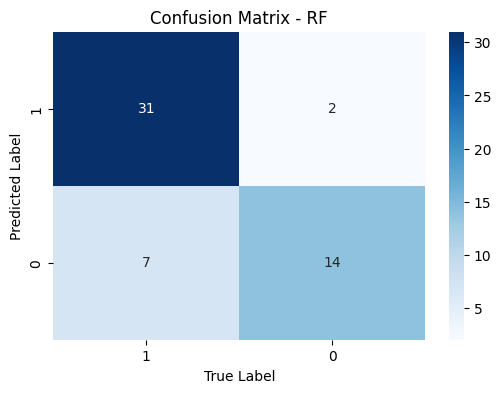

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train, test, and evaluate models
results = {}
for name, (model, params) in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Handles multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print metrics
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    class_labels = ['1','0']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
